### The simulation was run with only one seed for the random generator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import os
import particles

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

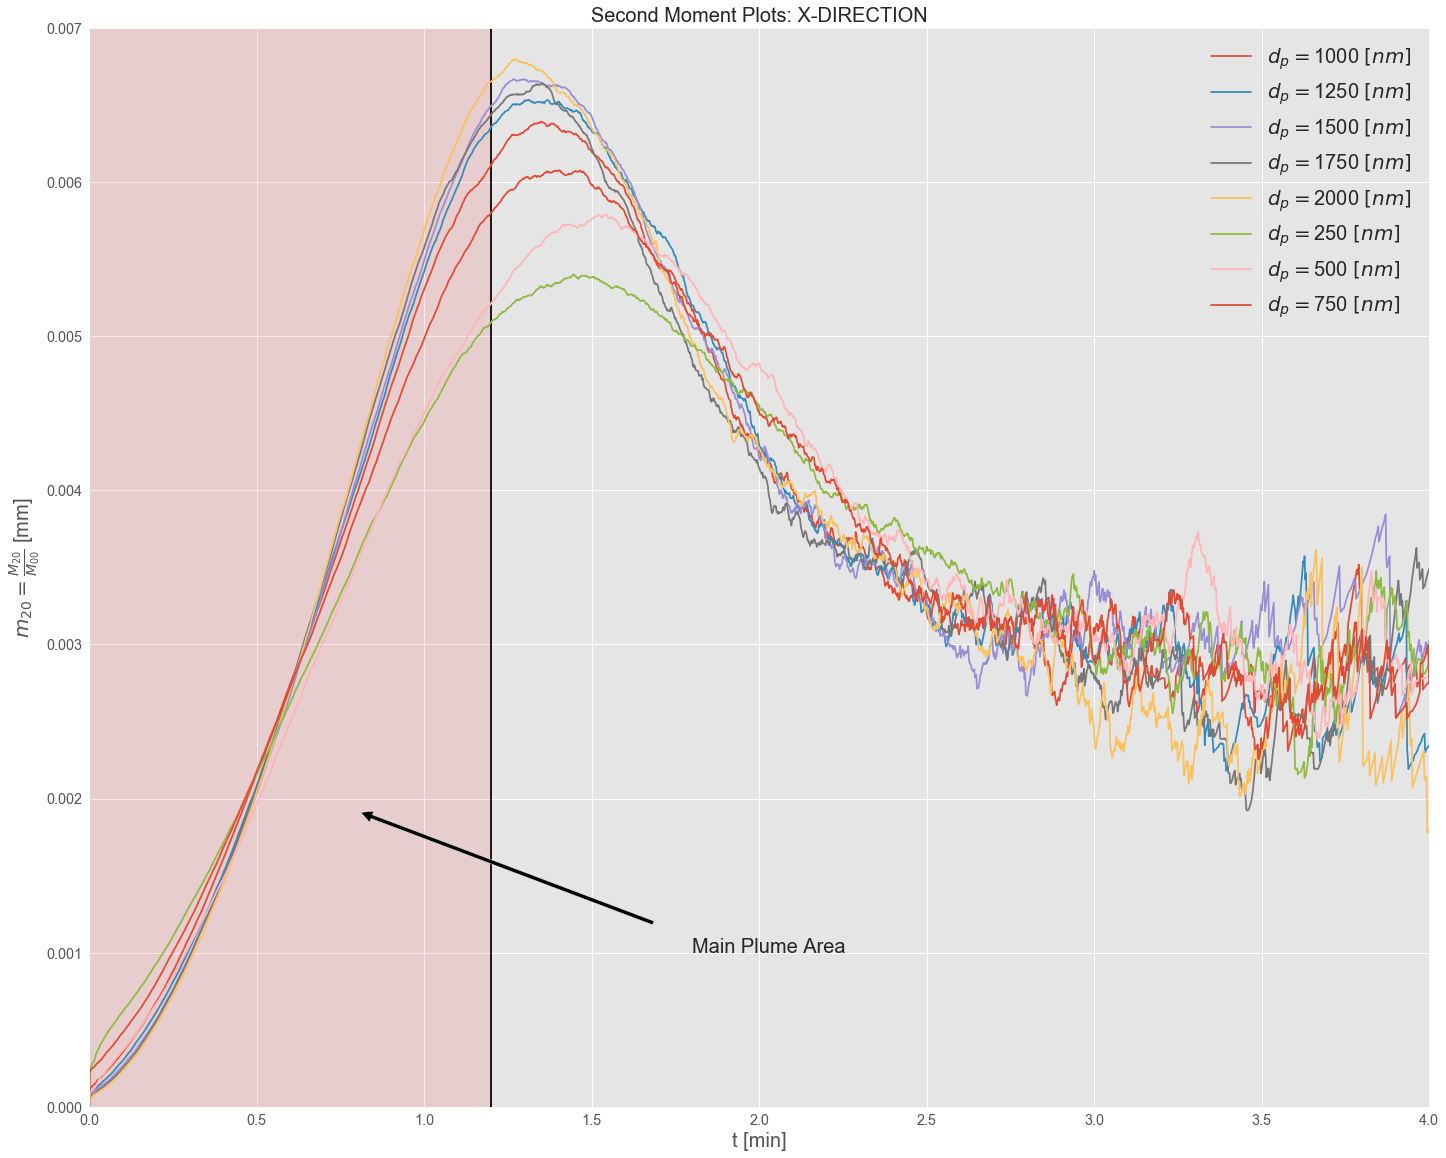

In [2]:
data_direction = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data/m2x/'


files = [data_direction+f for f in os.listdir(data_direction)]
files

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files]
diameters
fig, ax = plt.subplots()
for i, f in enumerate(files):
    pd.read_csv(f,index_col=0).mean(axis=1).plot(label=r'$d_p=$'+diameters[i]+r' $[nm]$',ax=ax)
plt.xlabel('t [min]', fontsize=20)
plt.ylabel(r'$m_{20}=\frac{M_{20}}{M_{00}}$ [mm]', fontsize=20)
plt.title(r'Second Moment Plots: X-DIRECTION', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
ymax, ymin=0.007,0
xmax, xmin=1.2,0
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=xmax)
plt.axvspan(xmin, xmax,  alpha=0.1, color='red')
plt.annotate('Main Plume Area', xy=(.7, .002), xytext=(1.8, .001),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20);

In [3]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/2_mom_x.png')

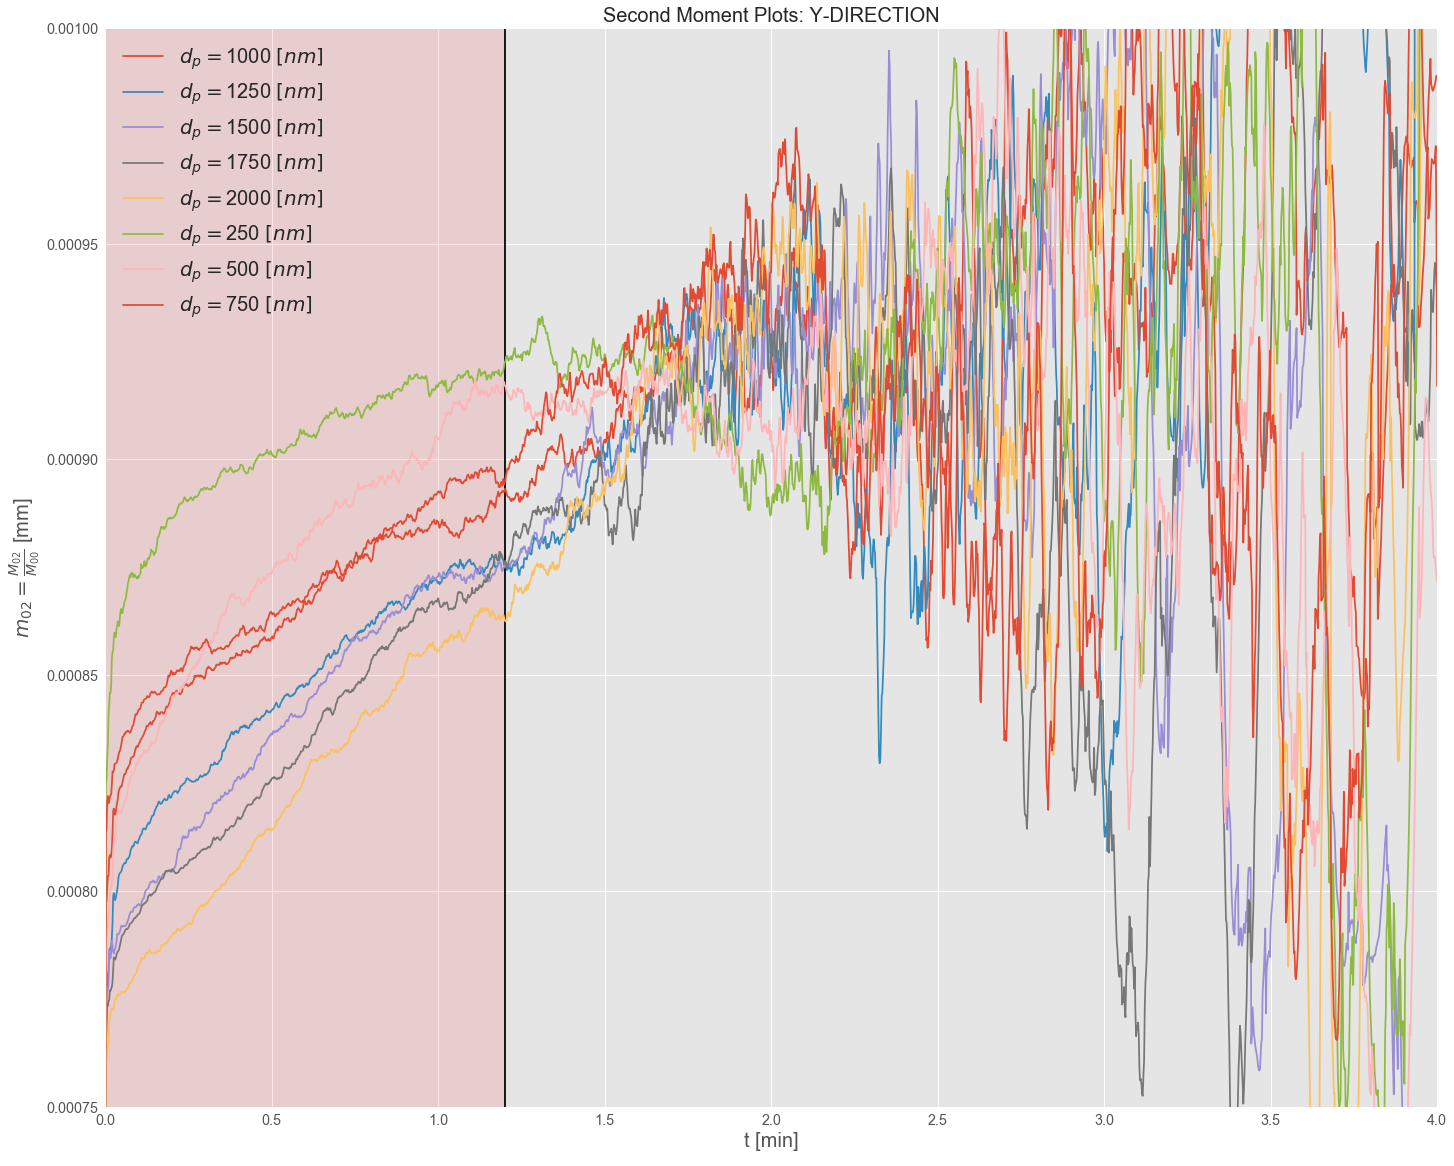

In [4]:
data_direction = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data/m2y/'


files = [data_direction+f for f in os.listdir(data_direction)]
files

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files]
diameters
fig, ax = plt.subplots()

for i, f in enumerate(files):
    pd.read_csv(f,index_col=0).mean(axis=1).plot(label=r'$d_p=$'+diameters[i]+r' $[nm]$',ax=ax)
plt.xlabel('t [min]', fontsize=20)
plt.ylabel(r'$m_{02}=\frac{M_{02}}{M_{00}}$ [mm]', fontsize=20)
plt.title(r'Second Moment Plots: Y-DIRECTION', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
ymax, ymin=0.001,0.00075
xmax, xmin=1.2,0
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=xmax)
plt.axvspan(xmin, xmax,  alpha=0.1, color='red')
plt.annotate('Main Plume Area', xy=(.7, .002), xytext=(1.8, .001),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20);

In [5]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/2_mom_y.png')

In [2]:
folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1'

files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]

spmo = SpatialMoments()


### the end of the media

L = .1 #mm

### particle diameter range [nm]

for f in files:
    print f.split('_')[1].split('.')[0]

d =[int(f.split('_')[1].split('.')[0]) for f in files]

files_ = [folder + f for f in files]

250
500
750
1000
1250
1500
1750
2000


In [3]:
# def zero_moment(pos):
#     m0 = []
#     for i in range(pos.shape[1]):
#         x_data = par.qx[i]
#         # count particles in media that are before the outlet of the mesh
#         particles_in_media = ((x_data>=0) & (x_data !=np.nan) & (x_data<.1)).sum()
#         m0.append(particles_in_media)
#     return np.array(m0)
def zero_moment(pos):
    m0 = []
    for t in range(pos.shape[1]):
        s = pos[t].dropna().shape[0]
        if s is None:
            m0.append(0)
        else:
            m0.append(s)
    return np.array(m0)

In [4]:
time = np.arange(0,4+1/200.,1/200.)

In [5]:
def mom(n, position, time, m0, norm=True):
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media for moment_{1} [m^{1}] @ time = {0} [min]".format(time[i],n))
            print("")
            break
        else:
            mn[i] = np.sum(position[i]**n)
    if norm:
        return mn/m0
    else:
        return mn

# Second Moment

### x-direction

/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1000.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_2000.txt


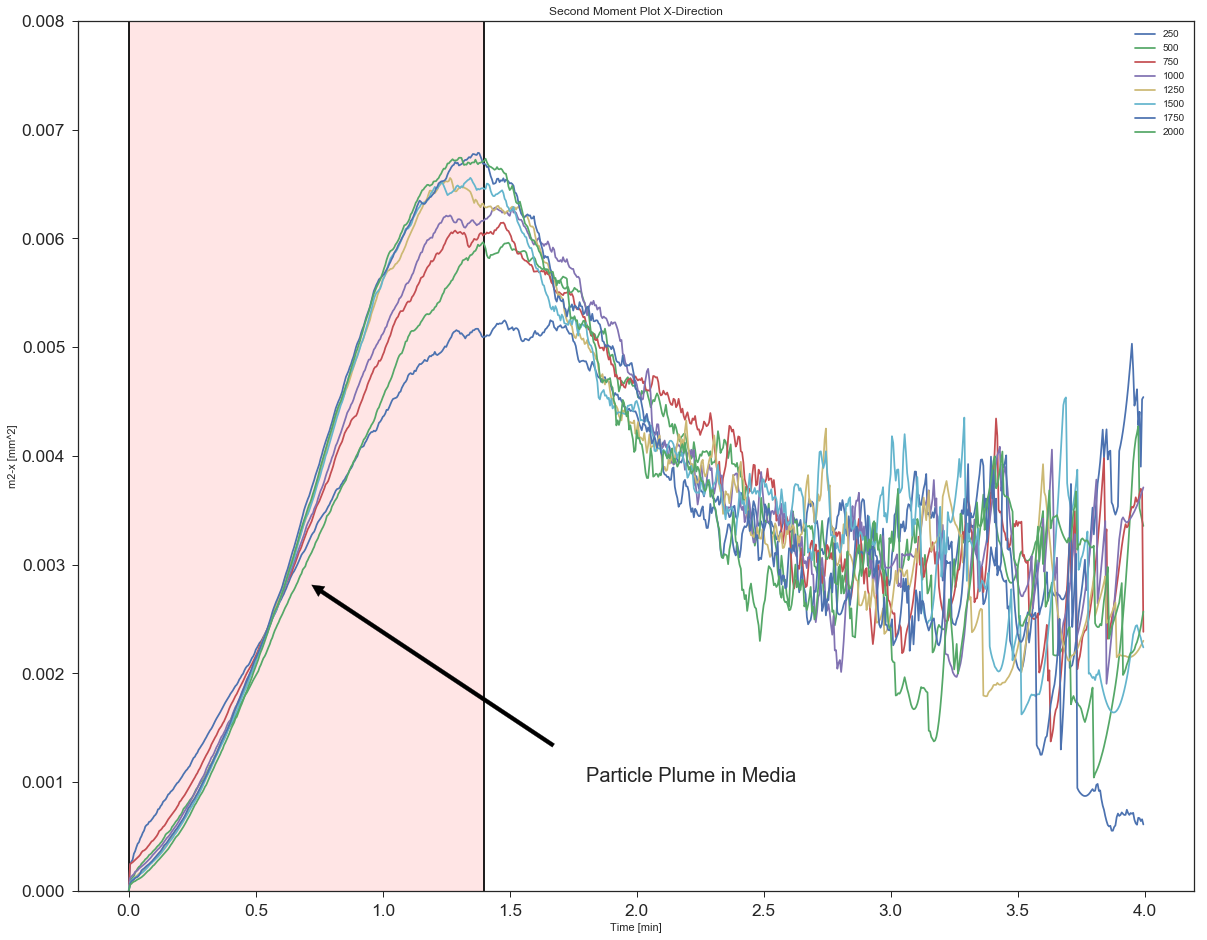

In [14]:
l_lim = 0
h_lim = 800
m2xs = []
for f in range(len(files_))[:]:
    print(files_[f])
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=200)
    x = par.qx[par.qx < 0.1]
    m0 = zero_moment(x)
    m2x = mom(2, position = x, time=time, m0=m0, norm=True)
    m2xs.append(m2x)
    plt.plot(time[l_lim:h_lim], m2x[l_lim:h_lim], label=d[f])
plt.xlabel('Time [min]')
plt.ylabel('m2-x [mm^2]')
plt.title('Second Moment Plot X-Direction')
plt.legend()
ymax,ymin=0.008,0
xmax,xmin=1.4,0
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=xmax)
plt.axvspan(xmin, xmax,  alpha=0.1, color='red')
plt.annotate('Particle Plume in Media', xy=(.6, .003), xytext=(1.8, .001),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20)

In [42]:
np.where(time==1.5)

(array([300]),)

In [50]:
time[280:400]

array([ 1.4  ,  1.405,  1.41 ,  1.415,  1.42 ,  1.425,  1.43 ,  1.435,
        1.44 ,  1.445,  1.45 ,  1.455,  1.46 ,  1.465,  1.47 ,  1.475,
        1.48 ,  1.485,  1.49 ,  1.495,  1.5  ,  1.505,  1.51 ,  1.515,
        1.52 ,  1.525,  1.53 ,  1.535,  1.54 ,  1.545,  1.55 ,  1.555,
        1.56 ,  1.565,  1.57 ,  1.575,  1.58 ,  1.585,  1.59 ,  1.595,
        1.6  ,  1.605,  1.61 ,  1.615,  1.62 ,  1.625,  1.63 ,  1.635,
        1.64 ,  1.645,  1.65 ,  1.655,  1.66 ,  1.665,  1.67 ,  1.675,
        1.68 ,  1.685,  1.69 ,  1.695,  1.7  ,  1.705,  1.71 ,  1.715,
        1.72 ,  1.725,  1.73 ,  1.735,  1.74 ,  1.745,  1.75 ,  1.755,
        1.76 ,  1.765,  1.77 ,  1.775,  1.78 ,  1.785,  1.79 ,  1.795,
        1.8  ,  1.805,  1.81 ,  1.815,  1.82 ,  1.825,  1.83 ,  1.835,
        1.84 ,  1.845,  1.85 ,  1.855,  1.86 ,  1.865,  1.87 ,  1.875,
        1.88 ,  1.885,  1.89 ,  1.895,  1.9  ,  1.905,  1.91 ,  1.915,
        1.92 ,  1.925,  1.93 ,  1.935,  1.94 ,  1.945,  1.95 ,  1.955,
      

### y-direction

/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1000.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_2000.txt


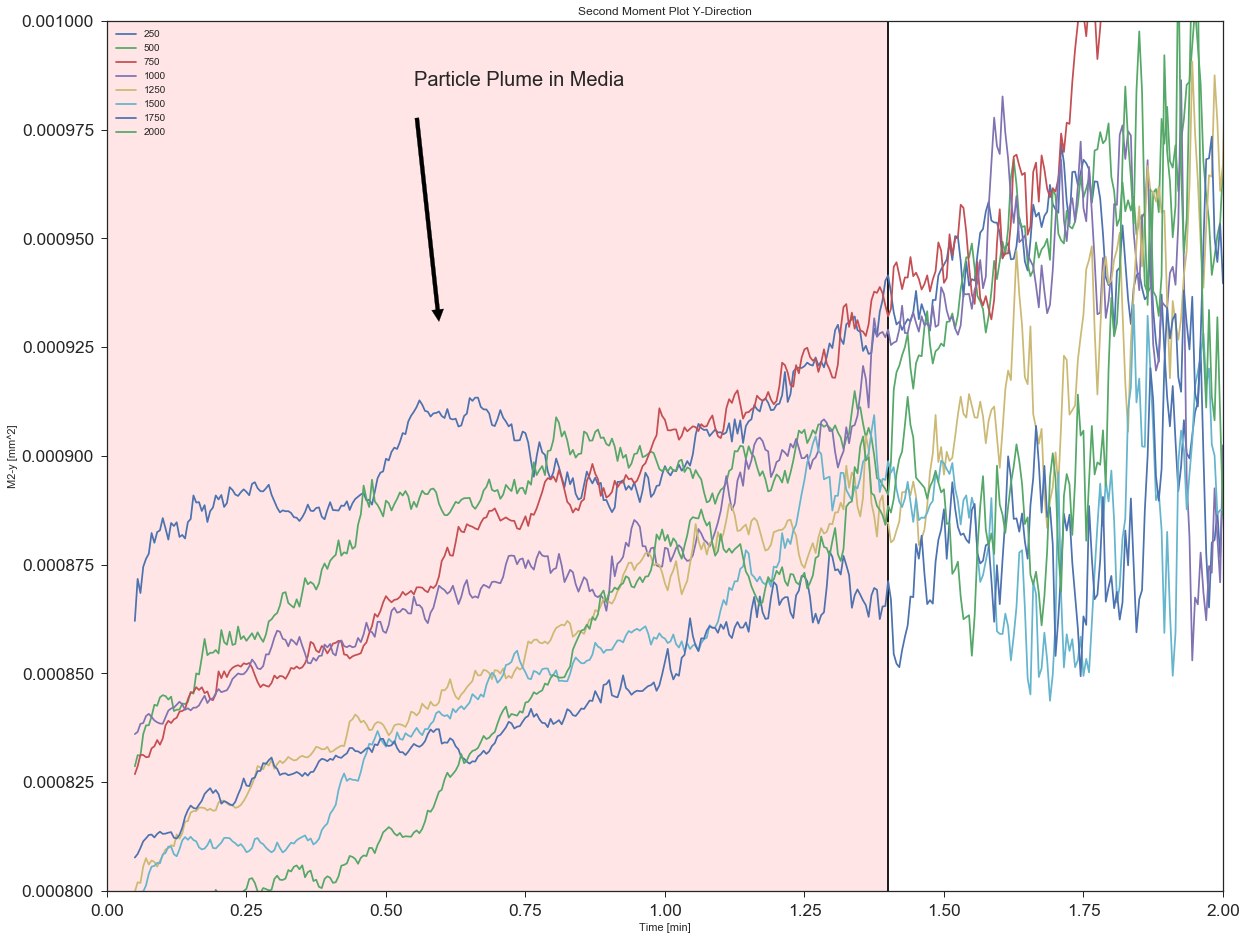

In [36]:
l_lim = 10
h_lim = 800
m2ys = []
for f in range(len(files_))[:]:
    print(files_[f])
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=200)
    x = par.qx[par.qx < 0.1]
    y = par.qy[par.qx < 0.1]
    m0 = zero_moment(x)    
    m2y = mom(2, position = y, time=time, m0=m0, norm=True)
    m2ys.append(m2y)
    plt.plot(time[l_lim:h_lim], m2y[l_lim:h_lim], label=d[f])
plt.xlabel('Time [min]')
plt.ylabel('M2-y [mm^2]')
plt.title('Second Moment Plot Y-Direction')
plt.legend()
ymax,ymin=0.001, 0.0008
xmax,xmin=1.4,0
plt.ylim(ymin,ymax)
plt.xlim(0,2)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=xmax)
plt.axvspan(xmin, xmax,  alpha=0.1, color='red')
plt.annotate('Particle Plume in Media', xy=(.6, .000925), xytext=(.55, .000985),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20)